In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Import train_test_split.
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_predict
# Import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
%matplotlib inline

In [2]:
#Reading in cleaned Train data
df = pd.read_csv('./train_data_clean.csv')

In [3]:
#Reading in cleaned Test data
df_test = pd.read_csv('./test_data_clean.csv')

In [4]:
corr_list = df.corr()

In [37]:
# sorting all correlations of SalePrice
corr_list  = corr_list[['SalePrice']].sort_values(by="SalePrice", ascending=False) # getting list of correlations for 'SalePrice'

In [38]:
corr_list

,SalePrice
SalePrice,1.000000
Overall_Qual,0.808871
Liv_SF,0.750161
Garage_Area,0.716803
Gr_Liv_Area,0.713988
Garage_Cars,0.704219
Total_Bsmt_SF,0.695277
1st_Flr_SF,0.665168
Mas_Vnr_Area,0.565146
Garage_Yr_Blt,0.555269


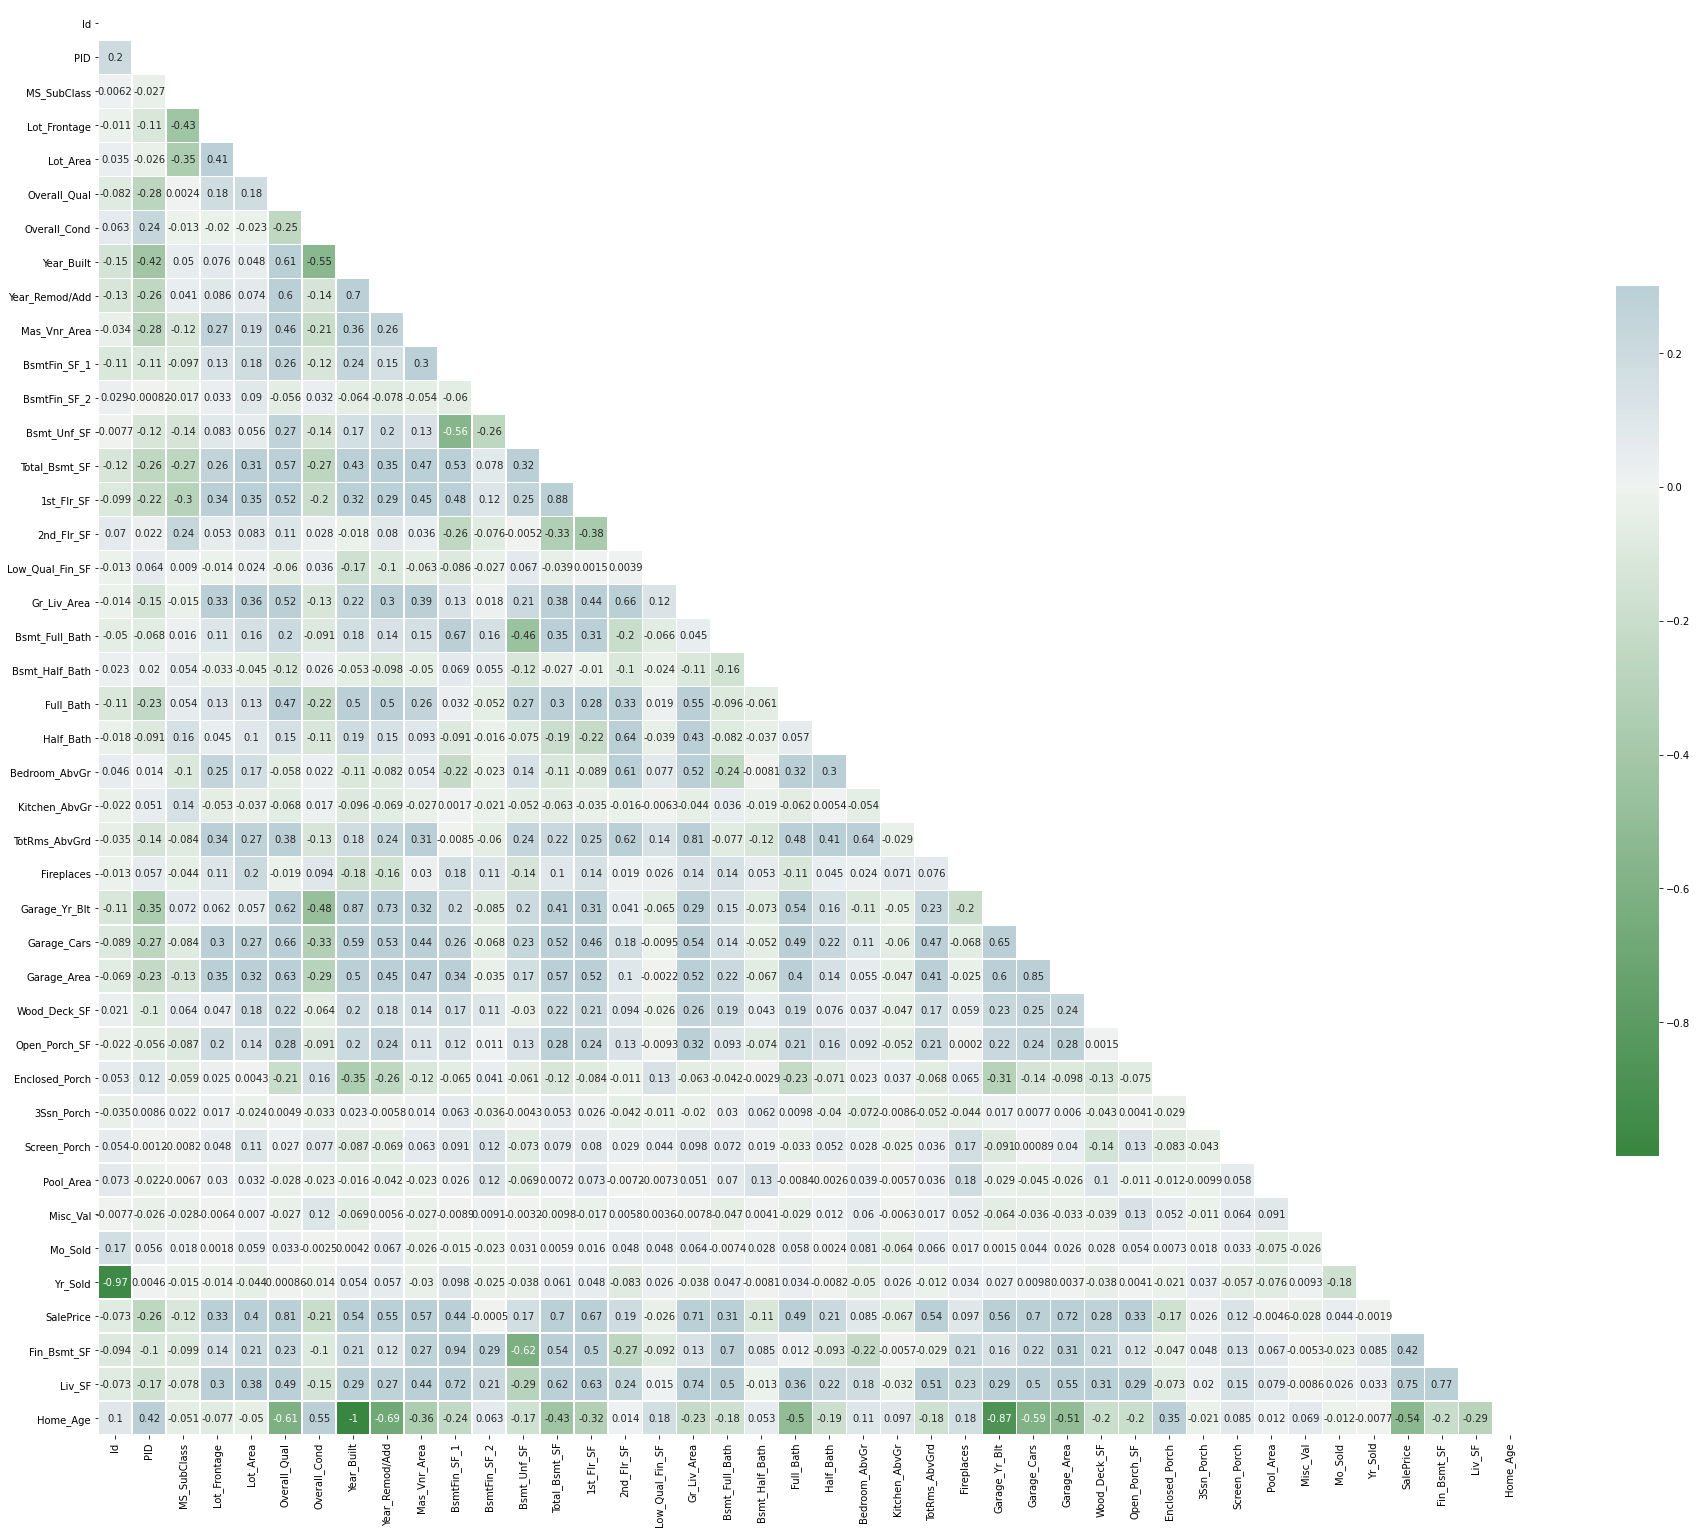

In [31]:
# from: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(32, 32))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(130, 1300, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [6]:
# Setting variables and prediction 

# Original features of th most sucessful model: 'Garage_Area','TotRms_AbvGrd','Gr_Liv_Area','1st_Flr_SF','Total_Bsmt_SF','Year_Built','Year_Remod/Add'

features = [
            'Overall_Qual',
            'Garage_Area',
            'TotRms_AbvGrd',
            'Liv_SF', 
            'Home_Age',
            'Full_Bath',
            'TotRms_AbvGrd',
            'Garage_Cars',
            'Garage_Area',
            'Liv_SF',  
            ]
X = df[features]

y = df['SalePrice']

X_test = df_test[features]

In [25]:
X.dtypes

Overall_Qual       int64
Garage_Area      float64
TotRms_AbvGrd      int64
Liv_SF           float64
Home_Age           int64
Full_Bath          int64
TotRms_AbvGrd      int64
Garage_Cars      float64
Garage_Area      float64
Liv_SF           float64
dtype: object

In [8]:
# Instantiate a linear regression model.
lr = LinearRegression()

In [9]:
# Fit our linear regression model to the training data. No splitting to test/train in our case.
lr.fit(X, y)

LinearRegression()

In [10]:
# Print out intercept, coefficients and score.
print(lr.intercept_)
print(lr.coef_)
print(lr.score(X, y))

-164800.7234109736
[ 3.02569039e+04  3.45850578e+01  3.22763106e+03  2.24861031e+01
 -2.06641482e+02 -7.09427282e+02  3.22763106e+03  1.86551249e+03
  3.45850578e+01  2.24861031e+01]
0.8454478234216887


In [11]:
# Cross Validation Score:
cross_val_score(estimator=lr, X=X, y=y, cv=7).mean()

0.8402284354087233

In [ ]:
# cross_val_predict(estimator=lr, X=X_test, y=y) Did not work as it y seems to be mandatory.

In [12]:
# Generating predictions on the test data
lr.predict(X_test)

array([172588.39906145, 175934.98128067, 216156.10099028,  81158.57090823,
       174621.13060014,  63921.04248655,  49786.23081884,  96573.84341372,
       183661.04606486, 182989.90322904, 148941.34289764, 103792.8966253 ,
       134325.75679263, 320338.51084567, 157814.5911384 , 100188.26739321,
       205029.89198409,  92295.0668328 , 198194.03057008, 223058.44288278,
       122535.19001318, 131033.08005077, 203059.32720779, 161905.94283508,
       182955.62493734,  93220.12573396,  87085.58993996, 108547.34007068,
       163697.87482655, -25122.78658462,  76144.49485498,  72611.80869692,
       257225.17653275, 146642.06365552, 196621.50992572, 184807.41453468,
        96205.77994835,  55413.54350145,  79977.55828629, 184236.53119142,
       136441.7202038 , 226839.16422714, 145827.45069118, 132931.28951697,
       223050.25957101,  46632.66490956, 230827.13932995, 110875.55102604,
        87647.10692715, 115336.63015991,  92223.5864902 , 244406.22363292,
       258805.47678569,  

In [13]:
Y_hat = lr.predict(X_test)

In [14]:
# assembling results in the output dataframe:
Y_hat = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': Y_hat}).sort_values(by="Id", ascending=True)

In [15]:
# Exporting file out
Y_hat.to_csv('./Sub_reg.csv', index=False)